In [1]:
%load_ext autoreload
%autoreload 2
# Add parent directory into system path
import sys, os
sys.path.insert(1, os.path.abspath(os.path.normpath('..')))

import torch
from torch import nn
from torch.nn.init import calculate_gain
if torch.cuda.is_available():
    for i in range(torch.cuda.device_count()):
        print(f'CUDA {i}: {torch.cuda.get_device_name(i)}')
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
#device = torch.device('cpu')

CUDA 0: NVIDIA GeForce GTX 1650 Ti


In [50]:
import numpy as np
x = np.linspace(-2, 2, 100)
y = np.linspace(-2, 2, 100)
z = np.linspace(-2, 2, 100)

p = np.array(np.meshgrid(x,y,z, indexing='ij')).T


In [51]:
p1 = p.reshape(100*100*100, 3)

In [52]:
xx, yy = np.meshgrid(x,y, indexing='ij')

In [81]:
f = 1 - (xx**2 + yy**2)
f2 = 1 - np.sqrt(xx**2 + yy**2 + 1e-9)

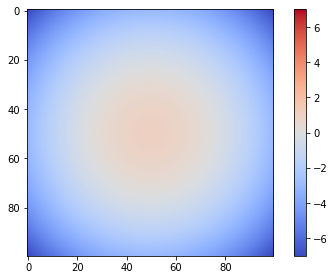

In [76]:
import matplotlib.pyplot as plt
from matplotlib.colors import CenteredNorm

plt.imshow(f, cmap="coolwarm", norm=CenteredNorm())
plt.tight_layout()
plt.colorbar()

0.04040404040404044


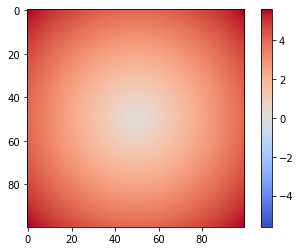

In [79]:
dx = x[1] - x[0]
print(dx)
gx, gy = np.gradient(f, dx, dx)

norm_g = np.sqrt(gx**2 + gy**2 + 1e-9)
plt.imshow(norm_g, cmap="coolwarm", norm=CenteredNorm())
plt.colorbar()

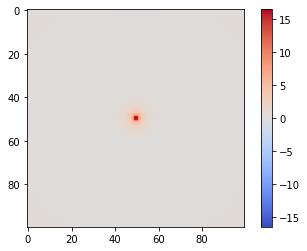

In [84]:
plt.imshow(f/norm_g - f2, cmap="coolwarm", norm=CenteredNorm())
plt.colorbar()